# 1.	Logistic regression ( Binary or multi-class)

Let's consider Binary classification 

	- Classify movie reviews as positive or negative, based on the text content of the reviews (binary cls)
		- data: Use standard IMDB available from keras
		- Prepare data and build model
		- Train and Validate
		- Validate your approach by plotting validation and training results 


# IMDB Dataset

A set of 50,000 highly polarized reviews from the
Internet Movie Database. 

They’re split into 25,000 reviews for training and 25,000
reviews for testing. 

Each set consisting of 50% negative and 50% positive reviews.



 **The IMDB dataset comes packaged with Keras.**

It has already been preprocessed: the reviews (sequences of words) have been turned into
sequences of integers, where each integer stands for a specific word in a dictionary.


**Developers of keras says: 'For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data'**

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)        # The argument num_words=10000 means you’ll only keep the top 10,000 most 
                      #       fre-quently occurring words in the training data.


Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


The variables train_data and test_data are lists of reviews; 

each review is a list of word indices (encoding a sequence of words). 

train_labels and test_labels are
lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [0]:
#train_data[0]

In [2]:
print(len(train_data))

25000


In [0]:
print(len(train_data[0]))

218


In [0]:
print(len(train_data[1]))

189


In [0]:
train_labels[0]

1

In [3]:
print(len(test_data))

25000


# We will explore data !

In [0]:
import numpy as np
data = np.concatenate((train_data, test_data), axis=0)
targets = np.concatenate((train_labels, test_labels), axis=0)

In [8]:
print("Categories:", np.unique(targets))
print("Number of unique words:", len(np.unique(np.hstack(data))))




Categories: [0 1]
Number of unique words: 9998


In [7]:
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))



Average Review length: 234.75892
Standard Deviation: 173.0


# Let's look at a single training example:

In [9]:
print("Label:", targets[0])

Label: 1


In [15]:
print(data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


**The code below retrieves the dictionary mapping word indices back into the original words so that we can read them.**

In [16]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )
print(decoded) 

1646592/1641221 [==============================] - 0s 0us/step
# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

# Preparing the data

We can’t feed lists of integers into a neural network. 

We have to turn your lists into
tensors. 

      1. One-hot encode your lists to turn them into vectors of
       0s and 1s. 

      This would mean, for instance, turning the sequence [3, 5] 
      into a 10,000-dimensional vector that would be all 0s 
      except for indices 3 and 5, which would be 1s. 
      
      Then you could use as the first layer in your network a
       Dense layer, capable of handling floating-point vector 
       data.

In [0]:
# Preparing the data
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))    # Creates an all-zero matrix of shape (len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.                         # Sets specific indices of results[i] to 1s
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [0]:
# Here’s what the samples look like now:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
#  We should also vectorize our labels, which is straightforward:


y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Building network 

      - The input data is vectors, and the labels are scalars 
      (1s and 0s):

      - We will use a simple stack of fully connected ( Dense )
       layers with relu activations: Dense(16,activation='relu').

      - each Dense layer (16) is the number of hidden units of 
      the layer.

      - Essential operation will be : 
          output = relu(dot(W, input) + b)

      - Think what would be the dimension of weight matrix here ?

So, our architecture will have: 

     
      - Two intermediate layers with 16 hidden units each
      - A third layer that will output the scalar prediction 
      regarding the sentiment of the current review



The intermediate layers will use relu as their activation function 

The final layer will use a sigmoid activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target “1”: how likely the review is to be
positive).

# Additional information 

### Let's see what **françois chollet** says: 

##### What are activation functions, and why are they necessary?


Without an activation function like relu (also called a non-linearity), the Dense layer
would consist of two linear operations—a dot product and an addition:

output = dot(W, input) + b


So the layer could only learn linear transformations (affine transformations) of the
input data: the hypothesis space of the layer would be the set of all possible linear
transformations of the input data into a 16-dimensional space. 

Such a hypothesis
space is too restricted and wouldn’t benefit from multiple layers of representations,
because a deep stack of linear layers would still implement a linear operation: adding
more layers wouldn’t extend the hypothesis space.


In order to get access to a much richer hypothesis space that would benefit from
deep representations, you need a non-linearity, or activation function. 

relu is the
most popular activation function in deep learning, but there are many other candi-
dates, which all come with similarly strange names: prelu, elu, and so on.

In [0]:



import numpy as np

from keras.preprocessing import sequence
from keras import models
from keras import layers
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)      # The argument num_words=10000 means you’ll only keep the top 10,000 most 
                      #       fre-quently occurring words in the training data.



# Preparing the data

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))    # Creates an all-zero matrix of shape (len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.                         # Sets specific indices of results[i] to 1s
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#  We should also vectorize your labels, which is straightforward:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')



# Model defintion 
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


#Validating your approach
#In order to monitor during training the accuracy of the model on data it has never
#seen before, you’ll create a validation set by setting apart 10,000 samples from the
#original training data.

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]




# Compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])

# Crossentropy is a quantity from the field of Information Theory 
                                        # that measures the distance between probability distributions or, in this
                                        #case, between the ground-truth distribution and your predictions.



# You can also configure the optimizers as below !!!!

#from keras import optimizers
#model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#loss='binary_crossentropy',
#metrics=['accuracy'])


# Using custom losses and metrics

#from keras import losses
#from keras import metrics
#model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#loss=losses.binary_crossentropy,
#metrics=[metrics.binary_accuracy])









history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))


Using TensorFlow backend.


17465344/17464789 [==============================] - 2s 0us/step





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 6s 375us/step - loss: 0.5243 - acc: 0.7779 - val_loss: 0.3875 - val_acc: 0.8605
Epoch 2/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.3019 - acc: 0.9023 - val_loss: 0.3135 - val_acc: 0.8779
Epoch 3/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.2238 - acc: 0.9269 - val_loss: 0.2790 - val_acc: 0.8912
Epoch 4/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.1734 - acc: 0.9453 - val_loss: 0.2769 - val_acc: 0.8883
Epoch 5/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.1451 - acc: 0.9533 - val_loss: 0.2834 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.1188 - acc:

Note that the call to model.fit() returns a **History object**. This object has a member history , which is a dictionary containing data about everything that happened
during training.

In [0]:
history_dict = history.history

In [0]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Let's use **Matplotlib** to plot
the training and validation loss side by side , as well as the training and
validation accuracy . 


**Note that your own results may vary slightly due to a different random initialization of your network.**

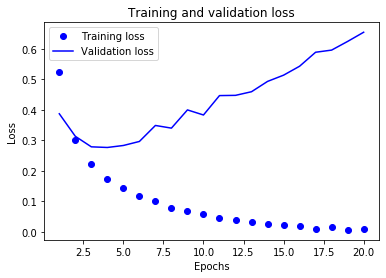

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


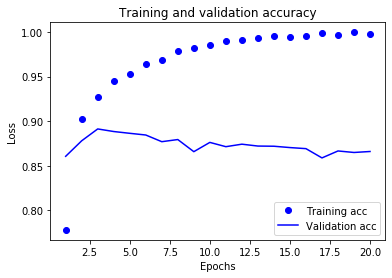

In [0]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Looking into the nature of graphs: 

This is an example of **overfit case**: A
model that performs better on the training data isn’t necessarily a model that will do
better on data it has never seen before. 

In precise terms, what you’re seeing is overfitting : 
after the second or third epoch, we’re overoptimizing on the training data, and you end
up learning representations that are specific to the training data and don’t generalize
to data outside of the training set.

** So, we train a network from scratch for four epochs and then evaluate it on the
test data.**

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.4578 - acc: 0.8230
Epoch 2/4
25000/25000 [==============================] - 2s 70us/step - loss: 0.2600 - acc: 0.9108
Epoch 3/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.2032 - acc: 0.9261
Epoch 4/4
25000/25000 [==============================] - 2s 96us/step


In [0]:
results

[0.3024928446483612, 0.88056]

In [0]:
print(x_test[0])

[0. 1. 1. ... 0. 0. 0.]


In [0]:
print(y_test[0])

0.0


In [0]:
some_variable = model.predict(x_test)  ### We can predict on new samples instead

In [0]:
print(type(some_variable))

<class 'numpy.ndarray'>


In [0]:
some_variable.shape

(25000, 1)

In [0]:
some_variable.ndim

2

In [0]:
some_variable[0,0]

0.21653476

In [0]:
some_variable[1,0]

0.99995637

In [0]:
print(y_test[1])

1.0


# How to experiment with different settings ? 

      - Exhaustive search over specified parameter values

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import GridSearchCV

import numpy as np

from keras.preprocessing import sequence
from keras import models
from keras import layers
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)


def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


def dl_ex_classifier(optimizer):
	classifier = models.Sequential()
	classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=10000))
	classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
	classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
 
	classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
	return classifier


classifier = KerasClassifier(build_fn=dl_ex_classifier)

parameters = {'batch_size': [256, 512], 'epochs': [2, 4], 'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv =10)

grid_search = grid_search.fit(x_train, y_train)

best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_


Epoch 1/2
22500/22500 [==============================] - 5s 216us/step - loss: 0.6015 - acc: 0.7444
Epoch 2/2
22500/22500 [==============================] - 2s 87us/step - loss: 0.2687 - acc: 0.8992
Epoch 1/2
22500/22500 [==============================] - 5s 218us/step - loss: 0.5797 - acc: 0.7920
Epoch 2/2
22500/22500 [==============================] - 2s 88us/step - loss: 0.2561 - acc: 0.9030
Epoch 1/2
22500/22500 [==============================] - 5s 218us/step - loss: 0.5871 - acc: 0.7764
Epoch 2/2
22500/22500 [==============================] - 2s 86us/step - loss: 0.2602 - acc: 0.9011
Epoch 1/2
22500/22500 [==============================] - 5s 220us/step - loss: 0.5898 - acc: 0.7146
Epoch 2/2
22500/22500 [==============================] - 2s 87us/step - loss: 0.2602 - acc: 0.9034
Epoch 1/2
22500/22500 [==============================] - 5s 222us/step - loss: 0.5823 - acc: 0.7870
Epoch 2/2
22500/22500 [==============================] - 2s 84us/step - loss: 0.2627 - acc: 0.9008
Epoch

In [0]:
best_parameters

{'batch_size': 512, 'epochs': 4, 'optimizer': 'rmsprop'}

In [0]:
best_accuracy

0.89512

# Default Cross validation value = 3 (5 in updated versions)


In [0]:
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import GridSearchCV

import numpy as np

from keras.preprocessing import sequence
from keras import models
from keras import layers
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)


def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


def dl_ex_classifier(optimizer):
	classifier = models.Sequential()
	classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=10000))
	classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
	classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
 
	classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
	return classifier


classifier = KerasClassifier(build_fn=dl_ex_classifier)

parameters = {'batch_size': [256, 512], 'epochs': [2, 4], 'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy')

grid_search = grid_search.fit(x_train, y_train)

best_parameters = grid_search.best_params_technology forecasting using patent analysis 
best_accuracy = grid_search.best_score_


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/2
16666/16666 [==============================] - 10s 578us/step - loss: 0.6445 - acc: 0.7373
Epoch 2/2
16666/16666 [==============================] - 1s 86us/step - loss: 0.3321 - acc: 0.8879
Epoch 1/2
16667/16667 [==============================] - 10s 579us/step - loss: 0.6342 - acc: 0.7434
Epoch 2/2
16667/16667 [==============================] - 1s 84us/step - loss: 0.3125 - acc: 0.8886
Epoch 1/2
16667/16667 [==============================] - 10s 583us/step - loss: 0.6478 - acc: 0.6440
Epoch 2/2
16667/16667 [==============================] - 1s 85us/step - loss: 0.3401 - acc: 0.8853
Epoch 1/2
16666/16666 [==============================] - 10s 578us/step - loss: 0.5832 - acc: 0.8007
Epoch 2/2
16666/16666 [==============================] - 1s 85us/step - loss: 0.3104 - acc: 0.8950
Epoch 1/2
16667/16667 [==============================] - 10s 591us/step - loss: 0.5867 - acc: 0.7782
Epoch 2/2
16667/16667 [==============================] - 1s 82us/step - loss: 0.3130 - acc: 0.8950


# 2. Classify Reuters newswires into 46 mutually exclusive topics


- Data: Use Reuters data from keras 
- each data point should be classified into only one category, the problem is more specifically an instance of single-label, multiclass classification
- Build model
- Train and Validate
- Check for overfit case if any: 
- Plot the results


# Use very few words( top 1000) and small number of epochs =5 

In [0]:
'''Trains and evaluate a simple MLP
on the Reuters newswire topic classification task.
'''
from __future__ import print_function

import numpy as np
import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

max_words = 1000 
batch_size = 32
epochs = 5

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

print('Vectorizing sequence data...')
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

print('Building model...')
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Loading data...
2113536/2110848 [==============================] - 1s 1us/step
8982 train sequences
2246 test sequences
46 classes
Vectorizing sequence data...
x_train shape: (8982, 1000)
x_test shape: (2246, 1000)
Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (8982, 46)
y_test shape: (2246, 46)
Building model...

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s 213us/step - loss: 1.4266 - acc: 0.6811 - val_loss: 1.0780 - val_acc: 0.7653
Epoch 2/5
8083/8083 [==============================] - 1s 172us/step - loss: 0.7941 - acc: 0.8122 - val_loss: 0.9091 - val_acc: 0.7898
Epoch 3/5
8083/8083 [==============================] - 1s 174us/step - loss: 0.5474 - acc: 0.8711 - val_loss: 0.8766 - val_acc: 0.7998
Epoch 4/5
8083/8083 [==============================] - 1s 171us/

In [0]:
score 

[0.8552183270560559, 0.7965271594475554]

# Just changing the number of epochs, does it make any difference in terms of loss and accuracy ? 

In [0]:
'''Trains and evaluate a simple MLP
on the Reuters newswire topic classification task.
'''
from __future__ import print_function

import numpy as np
import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

max_words = 1000
batch_size = 32
epochs = 25

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

print('Vectorizing sequence data...')
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

print('Building model...')
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Loading data...
8982 train sequences
2246 test sequences
46 classes
Vectorizing sequence data...
x_train shape: (8982, 1000)
x_test shape: (2246, 1000)
Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (8982, 46)
y_test shape: (2246, 46)
Building model...
Train on 8083 samples, validate on 899 samples
Epoch 1/25
8083/8083 [==============================] - 2s 211us/step - loss: 1.4107 - acc: 0.6816 - val_loss: 1.0627 - val_acc: 0.7631
Epoch 2/25
8083/8083 [==============================] - 1s 171us/step - loss: 0.7915 - acc: 0.8152 - val_loss: 0.9175 - val_acc: 0.8053
Epoch 3/25
8083/8083 [==============================] - 1s 171us/step - loss: 0.5483 - acc: 0.8656 - val_loss: 0.8686 - val_acc: 0.7964
Epoch 4/25
8083/8083 [==============================] - 1s 177us/step - loss: 0.4121 - acc: 0.8988 - val_loss: 0.8427 - val_acc: 0.8142
Epoch 5/25
8083/8083 [==============================] - 1s 169us/step - loss: 0.3369 - acc: 0.9161 - val

# Changing the value top words to considered from 1000 to 10000

In [0]:
'''Trains and evaluate a simple MLP
on the Reuters newswire topic classification task.
'''
from __future__ import print_function

import numpy as np
import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

max_words = 10000
batch_size = 32
epochs = 25

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

print('Vectorizing sequence data...')
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

print('Building model...')
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Loading data...
8982 train sequences
2246 test sequences
46 classes
Vectorizing sequence data...
x_train shape: (8982, 10000)
x_test shape: (2246, 10000)
Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (8982, 46)
y_test shape: (2246, 46)
Building model...
Train on 8083 samples, validate on 899 samples
Epoch 1/25
8083/8083 [==============================] - 4s 440us/step - loss: 1.3102 - acc: 0.7169 - val_loss: 0.9452 - val_acc: 0.7998
Epoch 2/25
8083/8083 [==============================] - 3s 372us/step - loss: 0.4979 - acc: 0.8864 - val_loss: 0.8598 - val_acc: 0.8120
Epoch 3/25
8083/8083 [==============================] - 3s 382us/step - loss: 0.2801 - acc: 0.9362 - val_loss: 0.9026 - val_acc: 0.8187
Epoch 4/25
8083/8083 [==============================] - 3s 378us/step - loss: 0.2114 - acc: 0.9493 - val_loss: 0.9545 - val_acc: 0.8176
Epoch 5/25
8083/8083 [==============================] - 3s 382us/step - loss: 0.1980 - acc: 0.9531 - v





# What is Information bottleneck ?? Can we check this with an example ???



In [0]:
'''Trains and evaluate a simple MLP
on the Reuters newswire topic classification task.
'''
from __future__ import print_function

import numpy as np
import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

max_words = 10000
batch_size = 32
epochs = 25

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

print('Vectorizing sequence data...')
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

print('Building model...')
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Loading data...
8982 train sequences
2246 test sequences
46 classes
Vectorizing sequence data...
x_train shape: (8982, 10000)
x_test shape: (2246, 10000)
Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (8982, 46)
y_test shape: (2246, 46)
Building model...
Train on 8083 samples, validate on 899 samples
Epoch 1/25
8083/8083 [==============================] - 4s 474us/step - loss: 2.9818 - acc: 0.3016 - val_loss: 2.1142 - val_acc: 0.3782
Epoch 2/25
8083/8083 [==============================] - 3s 377us/step - loss: 2.3805 - acc: 0.4125 - val_loss: 1.7256 - val_acc: 0.6040
Epoch 3/25
8083/8083 [==============================] - 3s 380us/step - loss: 2.0399 - acc: 0.4443 - val_loss: 1.6896 - val_acc: 0.5907
Epoch 4/25
8083/8083 [==============================] - 3s 382us/step - loss: 1.9224 - acc: 0.4417 - val_loss: 1.6482 - val_acc: 0.6007
Epoch 5/25
8083/8083 [==============================] - 3s 380us/step - loss: 1.8554 - acc: 0.4482 - v

# The importance of having sufficiently large intermediate layers

      -The final outputs are 46-dimensional, you should avoid 
      intermediate layers with many fewer than 46 hidden units. 

      - Now we saw what happens when you introduce an information
       bottleneck by having intermediate layers that are 
       significantly less than 46-dimensional: for example,
        4 dimensional.

The network now peaks at ~61% validation accuracy, 18% absolute drop. 


# Reason ?


---


This drop is mostly due to the fact that we’re trying to compress a lot of information (enough information to recover the separation hyperplanes of 46 classes) into an intermediate
space that is too low-dimensional.

# 3. Linear regression 
- Predict the median price of homes in a given Boston suburb in the mid-1970s, given data points about the suburb at the time, such as the crime rate, the local property tax rate, and so on.
	- Data: The Boston Housing Price dataset available from keras 
	- Build a model 
	- Train and validate 
	- Make use of  k-fold cross validation 
	- Plot the training and validation results 


In [0]:
import keras
keras.__version__

'2.2.5'

In [0]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

57344/57026 [==============================] - 0s 3us/step


In [0]:
train_data.shape

(404, 13)

In [0]:
test_data.shape

(102, 13)

As you can see, we have 404 training samples and 102 test samples. The data comprises 13 features. The 13 features in the input data are as follow:

      -Per capita crime rate.
      -Proportion of residential land zoned for lots over 25,000 
      square feet.
      -Proportion of non-retail business acres per town.
      -Charles River dummy variable (= 1 if tract bounds river; 
      0 otherwise).
      -Nitric oxides concentration (parts per 10 million).
      -Average number of rooms per dwelling.
      -Proportion of owner-occupied units built prior to 1940.
      -Weighted distances to five Boston employment centres.
      -Index of accessibility to radial highways.
      -Full-value property-tax rate per $10,000.
      -Pupil-teacher ratio by town.
      -1000 * (Bk - 0.63) ** 2 where Bk is the proportion of 
          Black people by town.
      -% lower status of the population.
      
The targets are the median values of owner-occupied homes, in thousands of dollars:

In [0]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

The prices are typically between \$10,000 and \$50,000. If that sounds cheap, remember this was the mid-1970s, and these prices are not inflation-adjusted.

# Preparing the data

It would be problematic to feed into a neural network values that all take wildly different ranges. 

The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult.

 A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation. This is easily done in Numpy:

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

**Note** that the quantities that we use for normalizing the test data have been computed using the training data. We should never use in our workflow any quantity computed on the test data, even for something as simple as data normalization.

# Building our network

Because so few samples are available, we will be using a very small network with two hidden layers, each with 64 units. 

In general, the less training data you have, the worse overfitting will be, and using a small network is one way to mitigate overfitting.

In [0]:
from keras import models
from keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

Our network ends with a single unit, and no activation (i.e. it will be linear layer). This is a typical setup for scalar regression (i.e. regression where we are trying to predict a single continuous value). Applying an activation function would constrain the range that the output can take; for instance if we applied a sigmoid activation function to our last layer, the network could only learn to predict values between 0 and 1. Here, because the last layer is purely linear, the network is free to learn to predict values in any range.

Note that we are compiling the network with the mse loss function -- Mean Squared Error, the square of the difference between the predictions and the targets, a widely used loss function for regression problems.

We are also monitoring a new metric during training: mae. This stands for Mean Absolute Error. It is simply the absolute value of the difference between the predictions and the targets. For instance, a MAE of 0.5 on this problem would mean that our predictions are off by \$500 on average.

# Validating our approach using K-fold validation

To evaluate our network while we keep adjusting its parameters (such as the number of epochs used for training), we could simply split the data into a training set and a validation set, as we were doing in our previous examples. However, because we have so few data points, the validation set would end up being very small (e.g. about 100 examples). A consequence is that our validation scores may change a lot depending on which data points we choose to use for validation and which we choose for training, i.e. the validation scores may have a high variance with regard to the validation split. This would prevent us from reliably evaluating our model.

The best practice in such situations is to use K-fold cross-validation. It consists of splitting the available data into K partitions (typically K=4 or 5), then instantiating K identical models, and training each one on K-1 partitions while evaluating on the remaining partition. The validation score for the model used would then be the average of the K validation scores obtained.

In terms of code, this is straightforward:

In [0]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
all_scores

[2.1080476930826015, 2.3698492970797096, 2.729290190309581, 2.472803566715505]

In [0]:
np.mean(all_scores)

2.419997686796849

# Let's try training the network for a bit longer: 150 epochs

In [0]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [0]:
num_epochs = 150
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


We can then compute the average of the per-epoch MAE scores for all folds:

In [0]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Let's plot this:

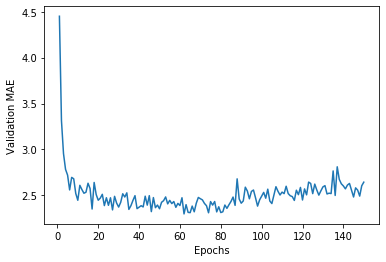

In [0]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

It may be a bit hard to see the plot due to scaling issues and relatively high variance. Let's:

Omit the first 10 data points, which are on a different scale from the rest of the curve.


Replace each point with an exponential moving average of the previous points, to obtain a smooth curve.

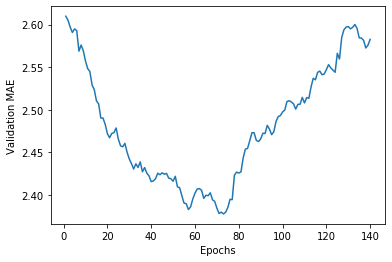

In [0]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

According to this plot, it seems that validation MAE stops improving significantly after 80 epochs. Past that point, we start overfitting.


Once we are done tuning other parameters of our model (besides the number of epochs, we could also adjust the size of the hidden layers), we can train a final "production" model on all of the training data, with the best parameters, then look at its performance on the test data:

In [0]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [0]:
Here's what you should take away from this example:

Regression is done using different loss functions from classification; Mean Squared Error (MSE) is a commonly used loss function for regression.
Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally the concept of "accuracy" does not apply for regression. A common regression metric is Mean Absolute Error (MAE).
When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
When there is little data available, using K-Fold validation is a great way to reliably evaluate a model.
When little training data is available, it is preferable to use a small network with very few hidden layers (typically only one or two), in order to avoid severe overfitting.

# Here's what you should take away from this example:

Regression is done using different loss functions from classification; Mean Squared Error (MSE) is a commonly used loss function for regression.


Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally the concept of "accuracy" does not apply for regression. A common regression metric is Mean Absolute Error (MAE).


When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.


When there is little data available, using K-Fold validation is a great way to reliably evaluate a model.
When little training data is available, it is preferable to use a small network with very few hidden layers (typically only one or two), in order to avoid severe overfitting.